# Llibreries científiques en Python - pandas

## ACTIVITAT

Analitzarem els incendis al brasil entre l'any 1998 i el 2007. https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil


Carregueu les dades de l'arxiu amazon.csv , que podeu trobar a la carpeta data, en un dataframe. Aquest conjunt de dades recull informació sobre el nombre d'incendis en boscos a Brasil entre el 1998 i el 2017.  Mostreu el número de files del dataframe i els noms de les columnes.

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [10]:

data = pd.read_csv('amazon.csv')

print(len(data),len(data.head()),data.head()[0:0])


6454 5 Empty DataFrame
Columns: [year, state, month, number, date]
Index: []


Agrupeu les dades carregades a l'exercici 1 per any i, per cada any, mostreu el nombre total d'incendis que hi va haver en tot el país.

In [11]:
group_year = data['number'].groupby(data['year'])
group_year.sum()

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

Mostra gràficament la lína temporal del nombre d'incendis al brasil durant els darrers anys

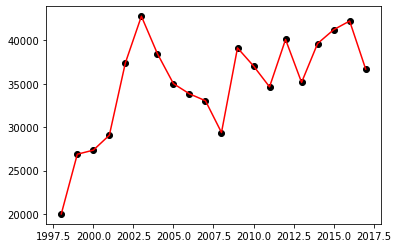

In [12]:
plt.scatter(data['year'].drop_duplicates(keep='first'),
            group_year.sum(),
            color='black')

plt.plot(data['year'].drop_duplicates(keep='first'),
         group_year.sum(),
         color='red')


Mostreu gràficament la suma total d'incendis per mes per detectar els mesos on es produeixen més incendis per mes



<AxesSubplot:xlabel='month'>

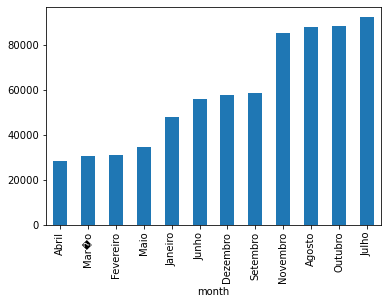

In [30]:
data.groupby(by='month').sum()['number'].sort_values(ascending=True).plot(kind='bar')



Mostreu també la mitja d'incendis anual, mensual i per estat

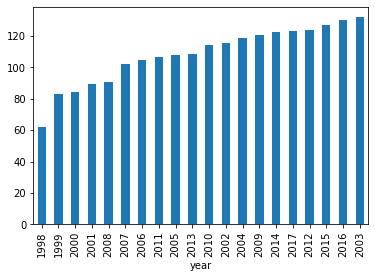

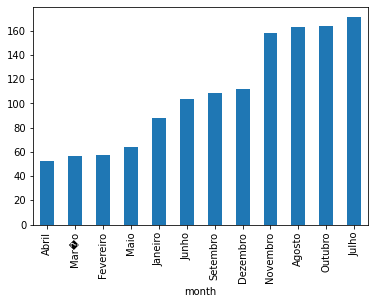

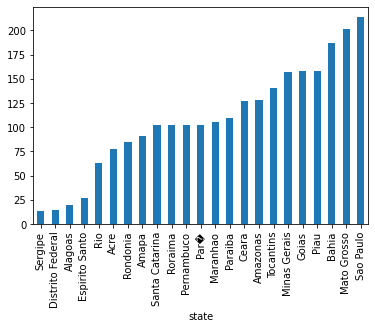

In [35]:
per_year=data.groupby(by='year').mean()['number'].sort_values(ascending=True).plot(kind='bar')

plt.show()

per_month=data.groupby(by='month').mean()['number'].sort_values(ascending=True).plot(kind='bar')

plt.show()

per_state=data.groupby(by='state').mean()['number'].sort_values(ascending=True).plot(kind='bar')

plt.show()




Mostreu els estats de Brasil on van enregistrar més de 800 incendis al mes, comptant els mesos de juny, juliol i agost. Heu de mostrar com a resultat una llista dels estats sense repetir.

** La funció unique us pot ser útil

In [46]:
data2 = data.query('number > 800 and (month== "Agosto" or month=="Junho" or month =="Julho")')
data2 = data2.groupby(['state','month']).sum()
data2

year  number
state        month                
Acre         Agosto   4013  1799.0
Amazonas     Agosto   2008   861.0
Bahia        Agosto  10025  4566.0
             Julho    4019  1717.0
Goias        Agosto   8030  3682.0
             Julho    4026  1778.0
Maranhao     Agosto   3999  1734.0
             Julho    2009   972.0
             Junho    8058  3499.0
Mato Grosso  Agosto   4012  1769.0
             Julho    4007  1794.0
             Junho    6026  2809.0
Minas Gerais Agosto  10030  4504.0
             Julho    2011   801.0
Paraiba      Agosto  10031  4462.0
             Julho    2017   891.0
Par�         Julho    8036  3684.0
Piau         Agosto   6014  2718.0
             Julho    4018  1783.0
             Junho    2012   834.0
Rio          Agosto   4019  1643.0
             Julho    4033  1750.0
Rondonia     Agosto   2013   885.0
             Julho    2016   969.0
Sao Paulo    Agosto   6020  2830.0
             Julho    2017   802.0
Tocantins    Agosto   2008   845.0
             Julho    8019  3777.0
             Junho    4025  1795.0

Mostra  gràficament la distrbució d'incendis per estat durant els mesos de juny, juliol i agost

<AxesSubplot:xlabel='state'>

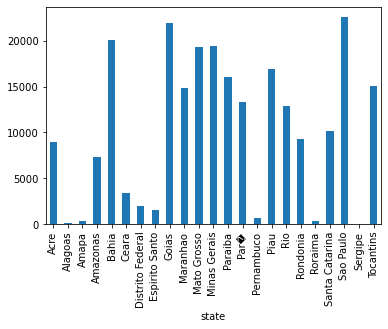

In [48]:
data2 = data.query('month== "Agosto" or month=="Junho" or month =="Julho"')
data2 = data2.groupby('state')['number'].sum()
data2.plot(x='state',y='month', kind = 'bar')

Volem buscar aquells estats on durant l'any 2017 van ocórrer més de 800 incendis al mes, durant qualsevol dels mesos de l'any. Heu de mostrar per pantalla l'estat, el mes (o els mesos si la condició es compleix en varis mesos) i el nombre total d'incendis enregistrats en el mes corresponent.

In [57]:
popo= data.query('year==2017 and number>800')
estados = popo.groupby(['state','month'])['number'].sum()
estados

state        month   
Amapa        Novembro    858.0
Ceara        Novembro    812.0
             Outubro     949.0
Maranhao     Junho       885.0
Mato Grosso  Maio        845.0
             Novembro    813.0
Paraiba      Agosto      987.0
             Julho       891.0
Rio          Agosto      819.0
             Julho       885.0
Sao Paulo    Agosto      981.0
             Julho       802.0
Name: number, dtype: float64